In [145]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [146]:
#Importing dataset
data=pd.read_csv("C:/Users/DC/Downloads/covid-usa.csv",parse_dates=['Last_Update'])
df1=pd.DataFrame(data)
df1

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [147]:
df=df1

In [148]:
#checking dtypes
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [149]:
#dropping unnecessary columns
df['Country_Region'].unique()

array(['US'], dtype=object)

In [150]:
df['Last_Update'].unique()

array(['2020-05-21T02:32:54.000000000'], dtype='datetime64[ns]')

Since country region and last update are the same for all rows, they can be discarded. Also since mapping is not in the scope of eda, we can discard lat long. And UID is just an indentifier sso it can be discarded also.

In [151]:
df.drop(['Last_Update'],axis=1,inplace=True)
df.drop(['Country_Region'],axis=1,inplace=True)
df.drop(['Lat'],axis=1,inplace=True)
df.drop(['Long_'],axis=1,inplace=True)
df.drop(['UID'],axis=1,inplace=True)

In [152]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [153]:
#checking and treating null values
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [154]:
a=['Recovered','Incident_Rate','People_Tested','People_Hospitalized','Testing_Rate']
#Imputation
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
for i in a:
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [155]:
df.drop(['Hospitalization_Rate'],axis=1,inplace=True)
df.drop(['Mortality_Rate'],axis=1,inplace=True)

In [156]:
df['Hospitalization_Rate']=(df['People_Hospitalized']*100)/df['Confirmed']

In [157]:
df['Mortality_Rate']=(df['Deaths']*100)/df['Confirmed']

In [158]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate,Mortality_Rate
0,Alabama,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,USA,3353.942386,1.143886e+01,3.999387
1,Alaska,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,USA,5063.940017,1.221310e+03,2.493766
2,American Samoa,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,ASM,222.857246,inf,NaN
3,Arizona,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,USA,2272.859351,1.202200e+01,5.011405
4,Arkansas,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,USA,3189.670370,1.069358e+01,2.138717
5,California,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,USA,3492.893832,5.694913e+00,4.066421
6,Colorado,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,USA,2289.339188,1.734877e+01,5.698118
7,Connecticut,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,USA,5349.302875,2.805444e+01,9.044775
8,Delaware,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,USA,4663.552976,5.976879e+01,3.783256
9,Diamond Princess,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,USA,3894.186870,9.994805e+03,0.000000


In [159]:
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Testing_Rate,Hospitalization_Rate,Mortality_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,57.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,3894.186870,inf,4.458248
std,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,1898.951207,NaN,2.135002
min,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,97.702058,3.248166,0.000000
25%,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,2741.843521,10.173396,3.072626
50%,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,3501.526835,16.854069,4.403318
75%,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,4622.586404,39.700779,5.466238
max,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,11377.424693,inf,9.545549


Outliers and skewness are present in some columns

In [160]:
df.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
Mortality_Rate          1
dtype: int64

In [161]:
df.at[2,'Hospitalization_Rate']=0

In [162]:
df.at[2,'Mortality_Rate']=0

In [163]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate,Mortality_Rate
0,Alabama,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,USA,3353.942386,11.438860,3.999387
1,Alaska,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,USA,5063.940017,1221.310360,2.493766
2,American Samoa,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,ASM,222.857246,0.000000,0.000000
3,Arizona,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,USA,2272.859351,12.022005,5.011405
4,Arkansas,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,USA,3189.670370,10.693584,2.138717
5,California,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,USA,3492.893832,5.694913,4.066421
6,Colorado,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,USA,2289.339188,17.348774,5.698118
7,Connecticut,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,USA,5349.302875,28.054438,9.044775
8,Delaware,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,USA,4663.552976,59.768789,3.783256
9,Diamond Princess,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,USA,3894.186870,9994.805195,0.000000


In [164]:
#LabelEncoder to change object variables to int
b=['Province_State','ISO3']
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for j in b:
    df[j]=le.fit_transform(df[j].astype(str))
df

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate,Mortality_Rate
0,0,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,4,3353.942386,11.438860,3.999387
1,1,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,4,5063.940017,1221.310360,2.493766
2,2,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,0,222.857246,0.000000,0.000000
3,3,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,4,2272.859351,12.022005,5.011405
4,4,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,4,3189.670370,10.693584,2.138717
5,5,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4,3492.893832,5.694913,4.066421
6,6,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,4,2289.339188,17.348774,5.698118
7,7,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,4,5349.302875,28.054438,9.044775
8,8,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,4,4663.552976,59.768789,3.783256
9,9,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,4,3894.186870,9994.805195,0.000000


In [165]:
#outliers treatment
from scipy.stats import zscore
threhold=3 
z=np.abs(zscore(df)) 
print(np.where(z>3))

(array([ 2,  5,  9, 13, 14, 34, 36, 36, 36, 36, 36, 36, 36, 39, 45],
      dtype=int64), array([ 9,  7,  5,  5,  9,  6,  1,  2,  3,  4,  6,  7,  8, 11, 10],
      dtype=int64))


In [166]:
df=df[(z<=3).all(axis=1)] 
df

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate,Mortality_Rate
0,0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,4,3353.942386,11.438860,3.999387
1,1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,4,5063.940017,1221.310360,2.493766
3,3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,4,2272.859351,12.022005,5.011405
4,4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,4,3189.670370,10.693584,2.138717
6,6,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,4,2289.339188,17.348774,5.698118
7,7,39017,3529,6264.000000,29224.0,9,1094.357902,190718.0,10946.000000,4,5349.302875,28.054438,9.044775
8,8,8194,310,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,4,4663.552976,59.768789,3.783256
10,10,7551,407,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,4,5727.106946,64.858357,5.390015
11,11,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4,3591.383953,18.819911,4.415327
12,12,39801,1697,7007.428571,38104.0,13,374.864974,402940.0,7107.000000,4,3795.082856,17.856335,4.263712


In [167]:
df.corr()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate,Mortality_Rate
Province_State,1.000000,-0.136152,-0.170377,0.051346,-0.166543,0.953554,-0.321634,-0.036267,-0.159719,0.048457,-0.124967,0.171126,-0.115048
Confirmed,-0.136152,1.000000,0.926520,0.482505,0.943955,-0.173643,0.601380,0.827392,0.599634,-0.012556,0.230581,-0.160670,0.393438
Deaths,-0.170377,0.926520,1.000000,0.466811,0.855370,-0.194042,0.656276,0.672798,0.601448,-0.008313,0.279074,-0.132296,0.602743
Recovered,0.051346,0.482505,0.466811,1.000000,0.189679,0.021861,0.209110,0.629824,0.271561,-0.107125,0.080585,-0.163162,0.259283
Active,-0.166543,0.943955,0.855370,0.189679,1.000000,-0.189481,0.570870,0.717466,0.587205,-0.013423,0.194341,-0.128684,0.331080
FIPS,0.953554,-0.173643,-0.194042,0.021861,-0.189481,1.000000,-0.340040,-0.098359,-0.103127,0.033747,-0.235333,0.360214,-0.031642
Incident_Rate,-0.321634,0.601380,0.656276,0.209110,0.570870,-0.340040,1.000000,0.265850,0.558464,-0.011914,0.526630,-0.179743,0.364998
People_Tested,-0.036267,0.827392,0.672798,0.629824,0.717466,-0.098359,0.265850,1.000000,0.489558,-0.000827,0.170936,-0.183917,0.201441
People_Hospitalized,-0.159719,0.599634,0.601448,0.271561,0.587205,-0.103127,0.558464,0.489558,1.000000,0.000000,0.124134,0.102319,0.528880
ISO3,0.048457,-0.012556,-0.008313,-0.107125,-0.013423,0.033747,-0.011914,-0.000827,0.000000,1.000000,0.082571,0.691427,0.225294


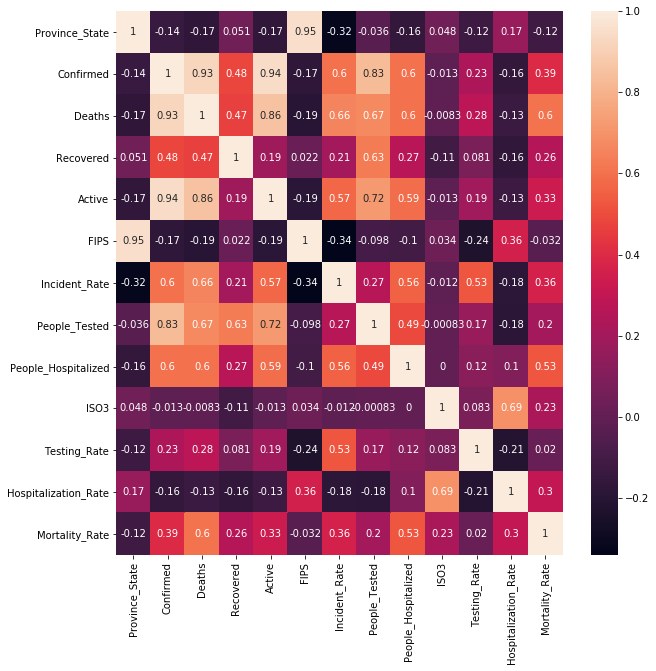

In [168]:
#Correlation 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Confirmed, deaths,active, incident rate, people tested and people hospitalized have very high positive correlation among eachother . ISO3 has positive correlation with hospitalization rate. Mortality rate has positive correlation with people hospitalized.

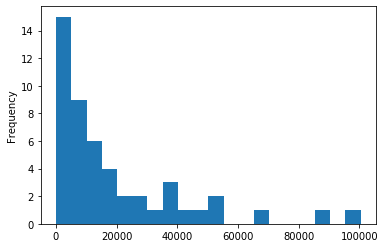

In [169]:
plt.figure()
df['Confirmed'].plot(kind='hist',bins=20)

Confirmed from 0 to 5000(Approx) has the highest frequency

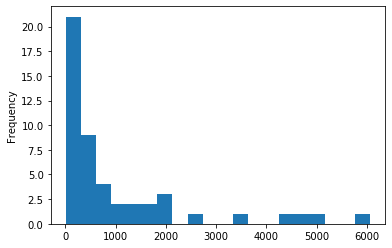

In [170]:
plt.figure()
df['Deaths'].plot(kind='hist',bins=20)

Deaths= 0 to 250 (approx) has the highest frequency.

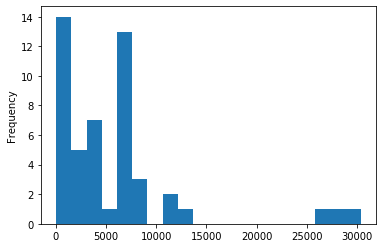

In [171]:
plt.figure()
df['Recovered'].plot(kind='hist',bins=20)

Recovered= 0 to 1000 (approx) has the highest frequency.

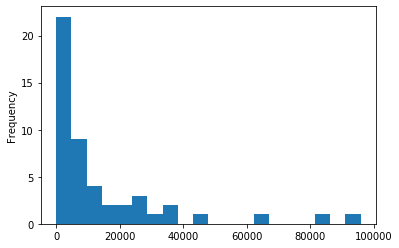

In [172]:
plt.figure()
df['Active'].plot(kind='hist',bins=20)

Active= 0 to 5000 (approx) has the highest frequency.

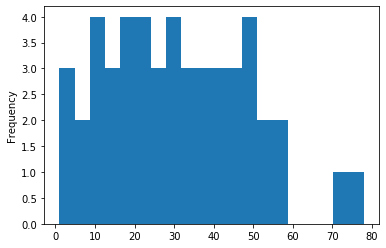

In [173]:
plt.figure()
df['FIPS'].plot(kind='hist',bins=20)

FIPS 10,20,30,50 has the highest frequency.

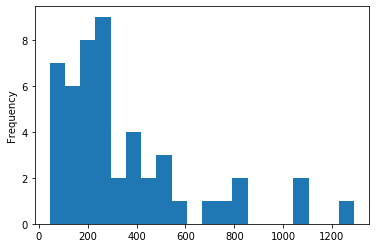

In [174]:
plt.figure()
df['Incident_Rate'].plot(kind='hist',bins=20)

Incident rate= 200 to 250 (approx) has the highest frequency.

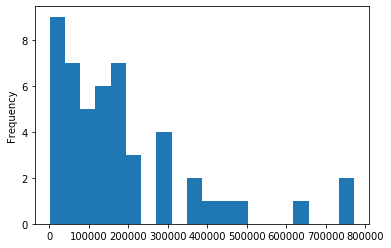

In [175]:
plt.figure()
df['People_Tested'].plot(kind='hist',bins=20)

People tested=0 to 3000 (approx) has the highest frequency.

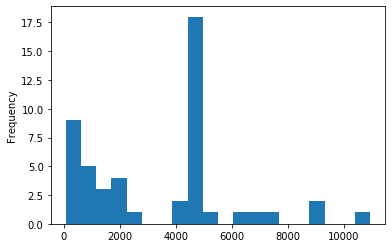

In [176]:
plt.figure()
df['People_Hospitalized'].plot(kind='hist',bins=20)

People hospitalized=4000 to 5000 (approx) has the highest frequency.

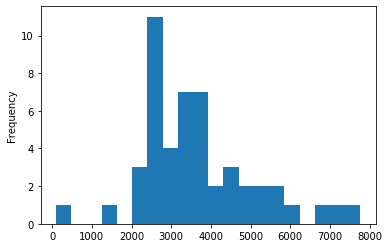

In [177]:
plt.figure()
df['Testing_Rate'].plot(kind='hist',bins=20)

Testing rate=2500 (approx) has the highest frequency.

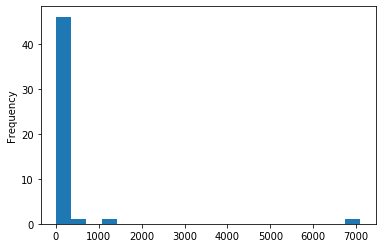

In [178]:
plt.figure()
df['Hospitalization_Rate'].plot(kind='hist',bins=20)

Hospitalization rate= 0 to 300 (approx) has the highest frequency.

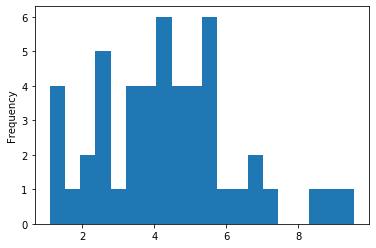

In [179]:
plt.figure()
df['Mortality_Rate'].plot(kind='hist',bins=20)

Mortality rate=4 (approx) has the highest frequency.

<Figure size 432x288 with 0 Axes>

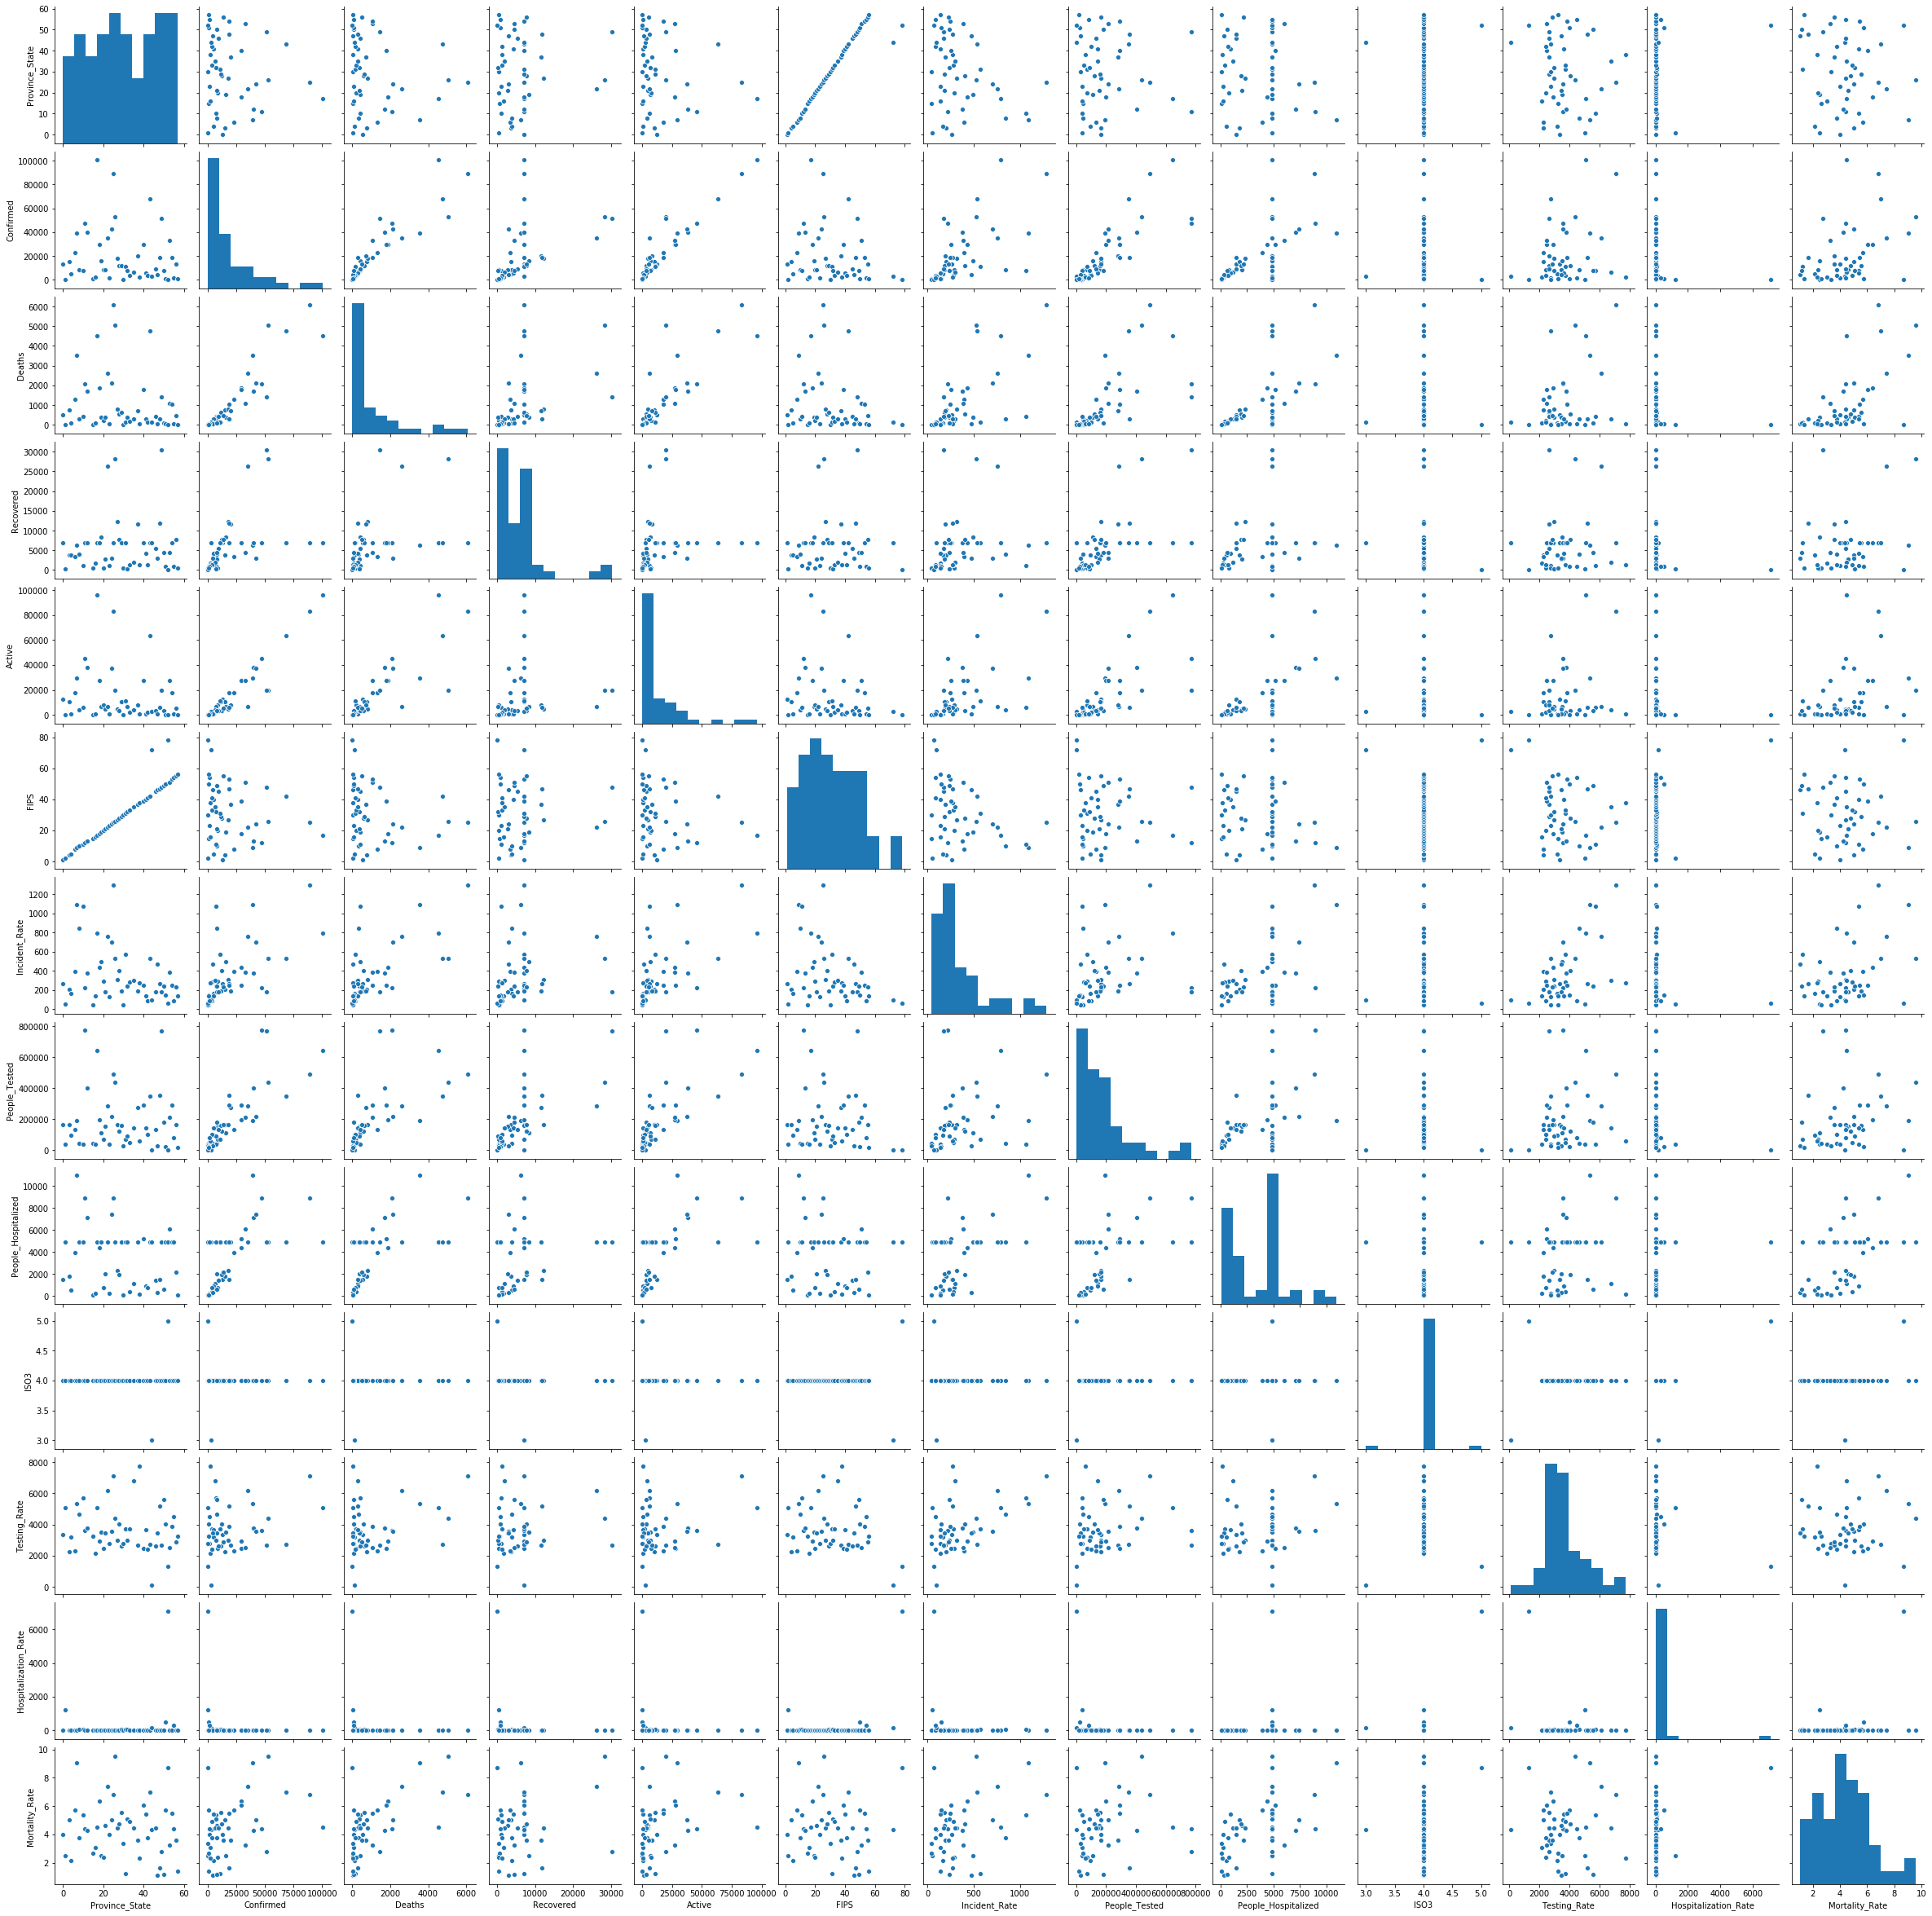

In [180]:
plt.figure()
sns.pairplot(df)

taking Mortality rate as y variable

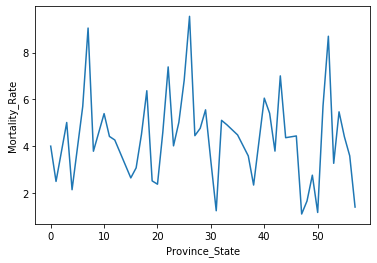

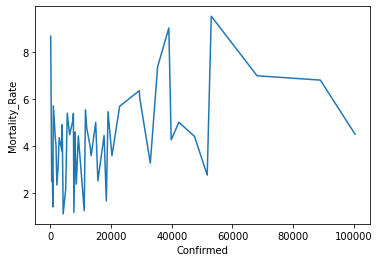

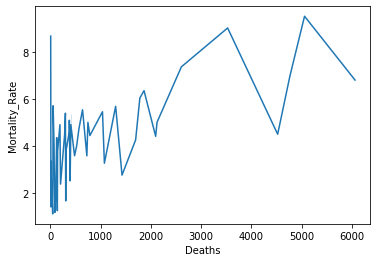

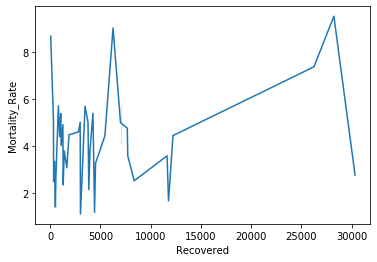

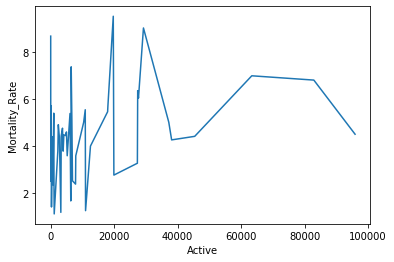

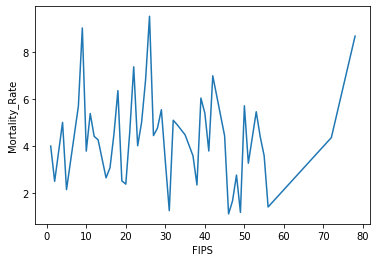

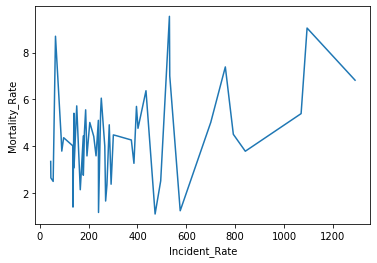

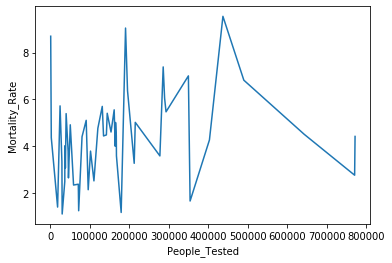

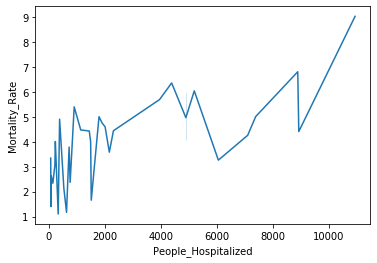

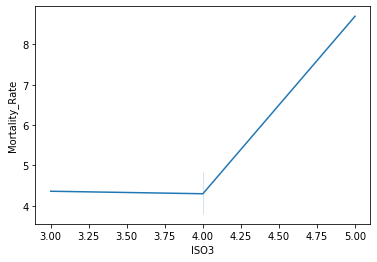

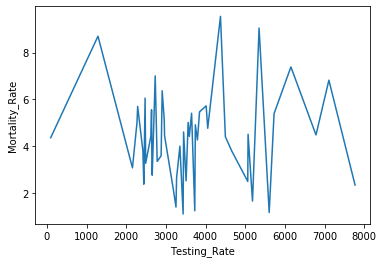

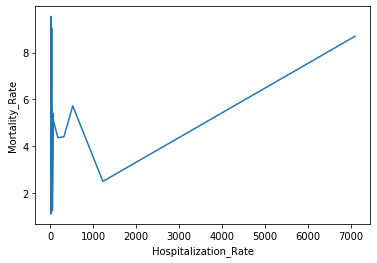

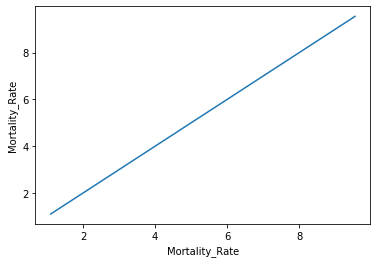

In [181]:
for i in df.columns:
    plt.figure()
    sns.lineplot(i,'Mortality_Rate',data=df)

<Figure size 432x288 with 0 Axes>

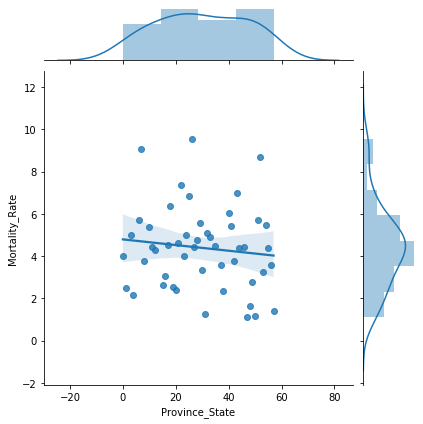

<Figure size 432x288 with 0 Axes>

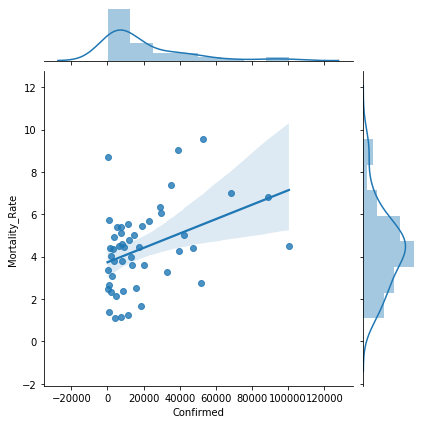

<Figure size 432x288 with 0 Axes>

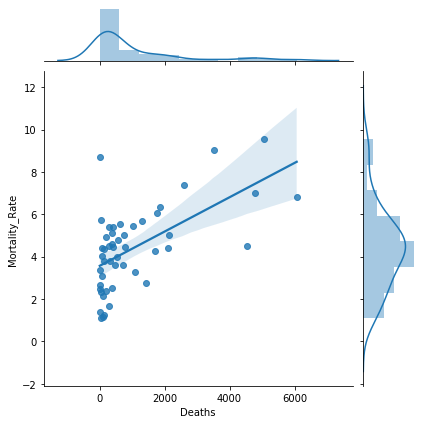

<Figure size 432x288 with 0 Axes>

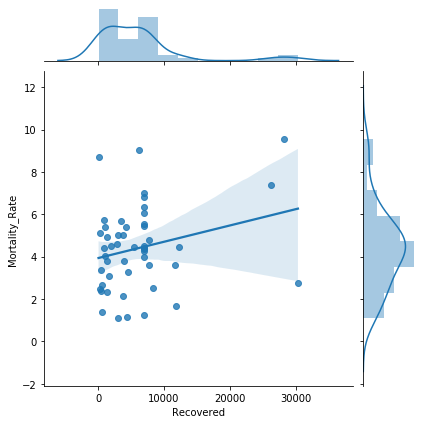

<Figure size 432x288 with 0 Axes>

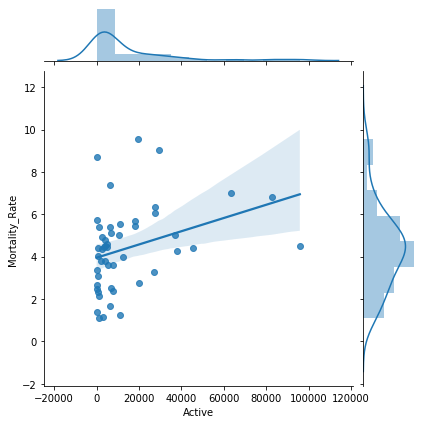

<Figure size 432x288 with 0 Axes>

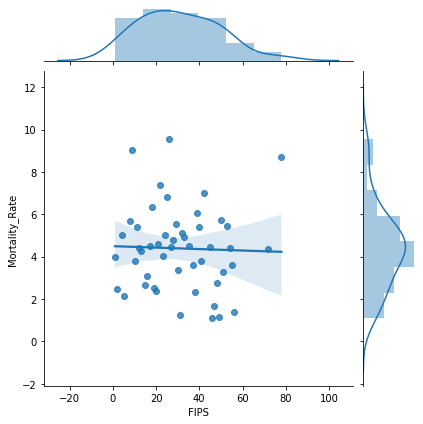

<Figure size 432x288 with 0 Axes>

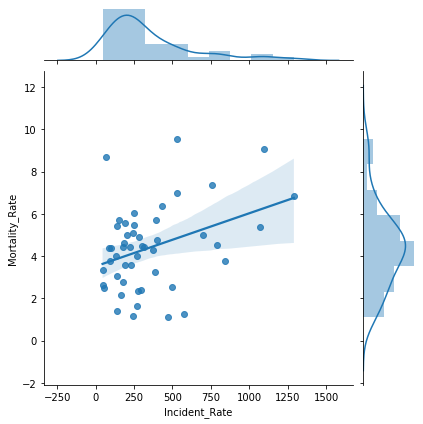

<Figure size 432x288 with 0 Axes>

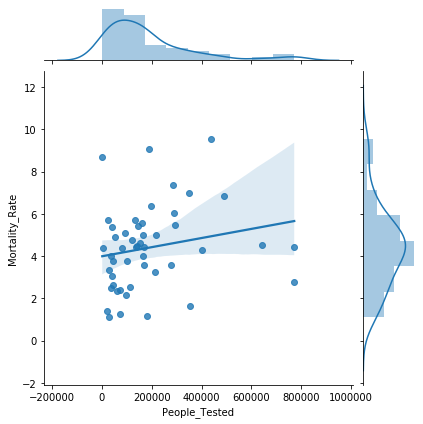

<Figure size 432x288 with 0 Axes>

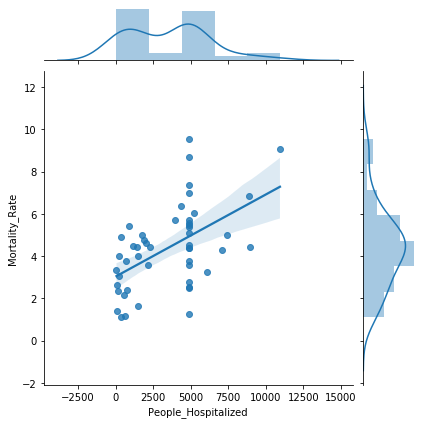

<Figure size 432x288 with 0 Axes>

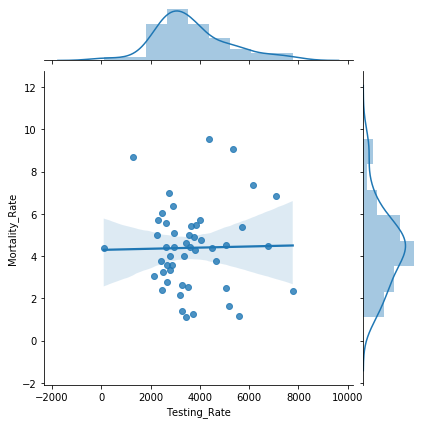

<Figure size 432x288 with 0 Axes>

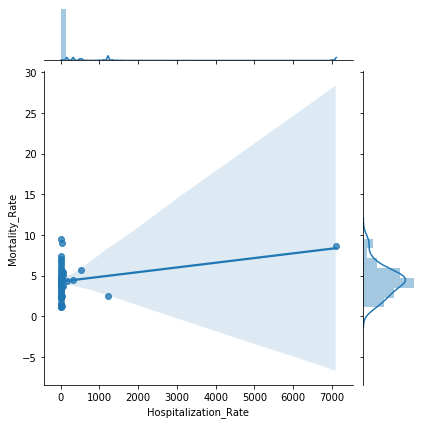

<Figure size 432x288 with 0 Axes>

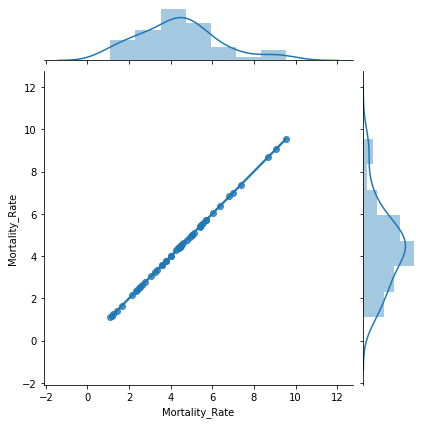

In [190]:
df2=df.drop(['ISO3'],axis=1)
for i in df2.columns:
    plt.figure()
    sns.jointplot(i,'Mortality_Rate',data=df,kind='reg')

Mortality rate decreases as province_state number increases. Mortality rate increases as confirmed number increases. Mortality rate increases as deaths number increases. Mortality rate increases as Recovered number increases.  Mortality rate increases as active number increases. Mortality rate increases as FIPS number decreases. Mortality rate increases as incident rate increases. Mortality rate increases as people tested and hospitalized increases. Mortality rate increases slightly as Testing rate increases. Mortality rate increases slightly as Hospitalization rate increases.

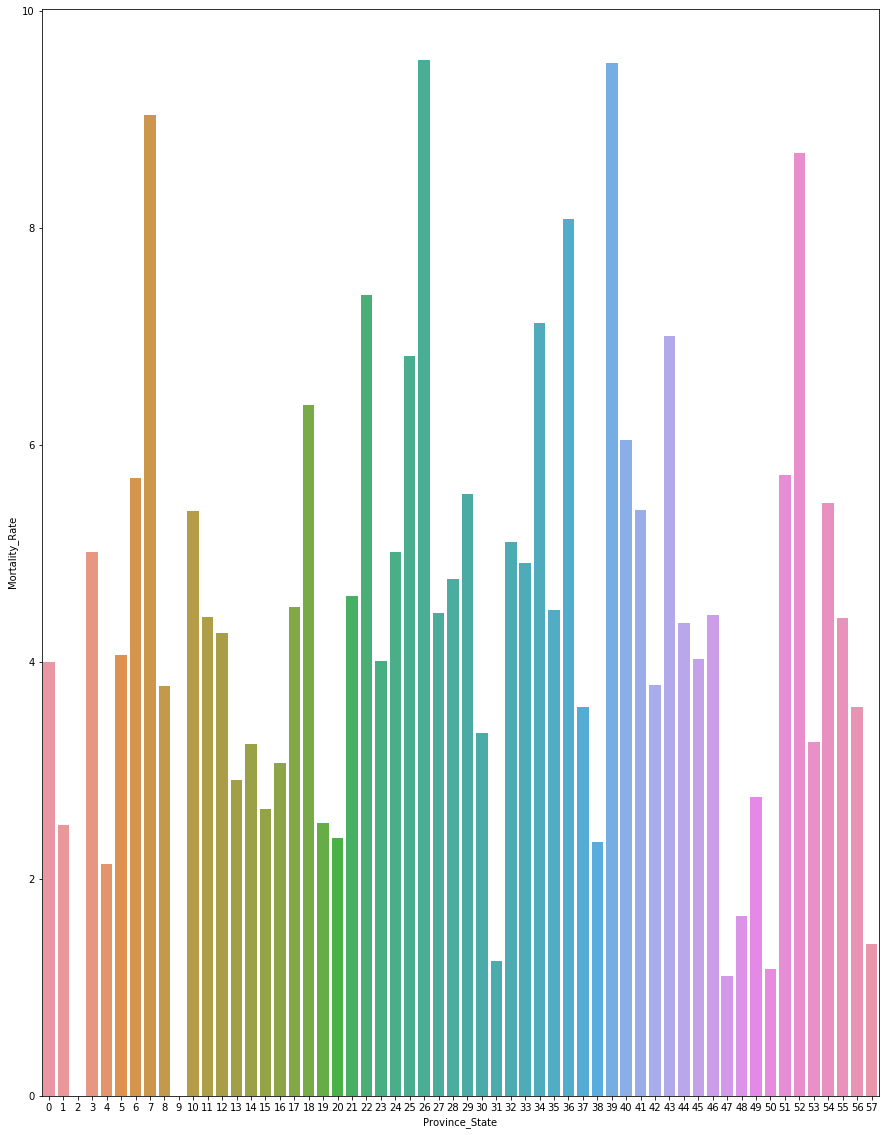

In [183]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Mortality_Rate',data=df1)

State 26 has the highest mortality rate

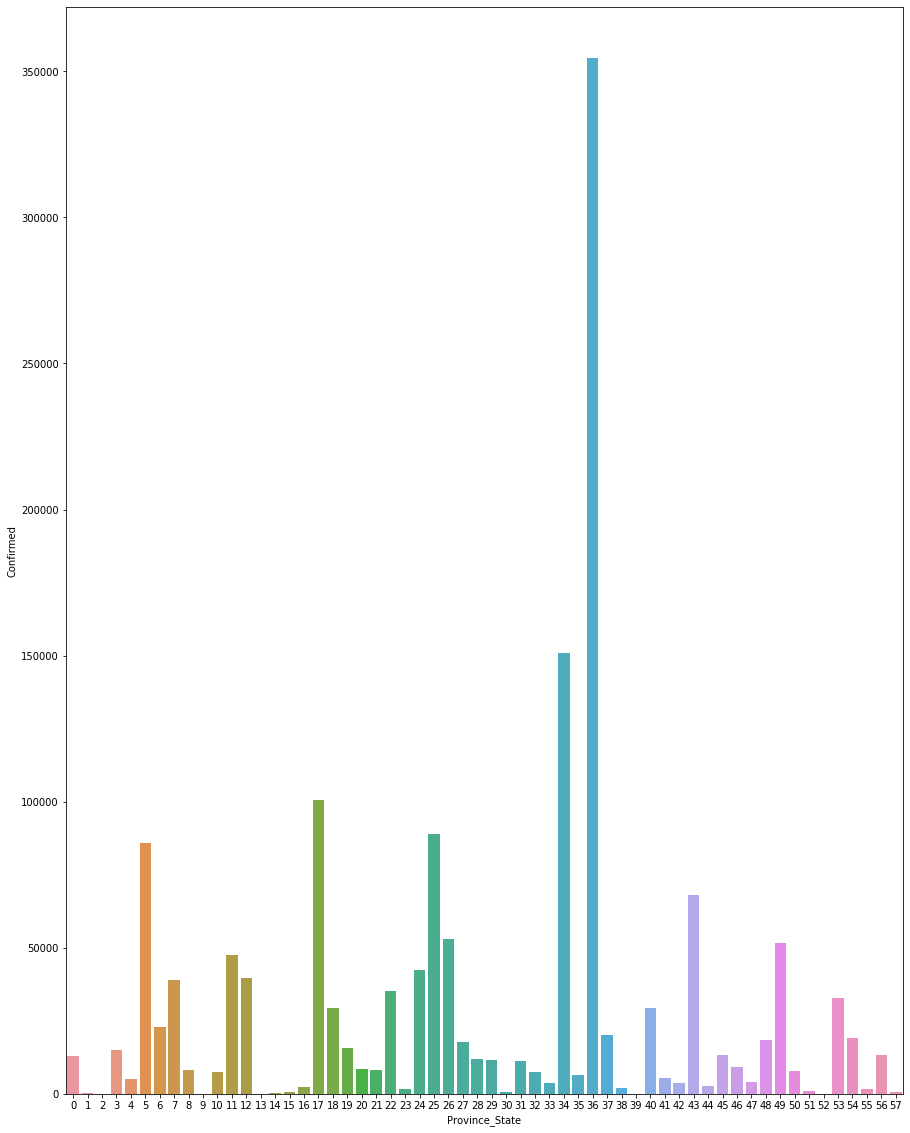

In [184]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Confirmed',data=df1)

State 36 has the highest number of confirmed cases.

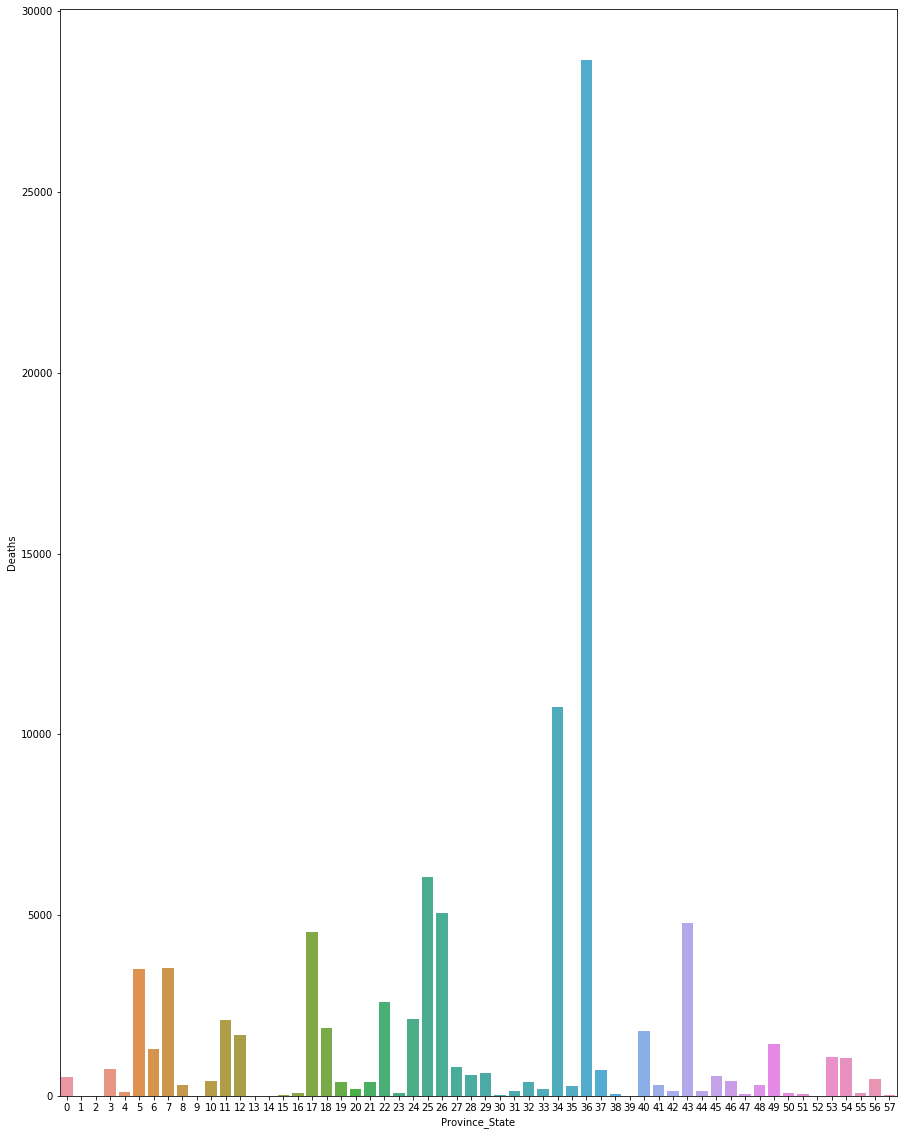

In [185]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Deaths',data=df1)

State 36 has the highest number of deaths.

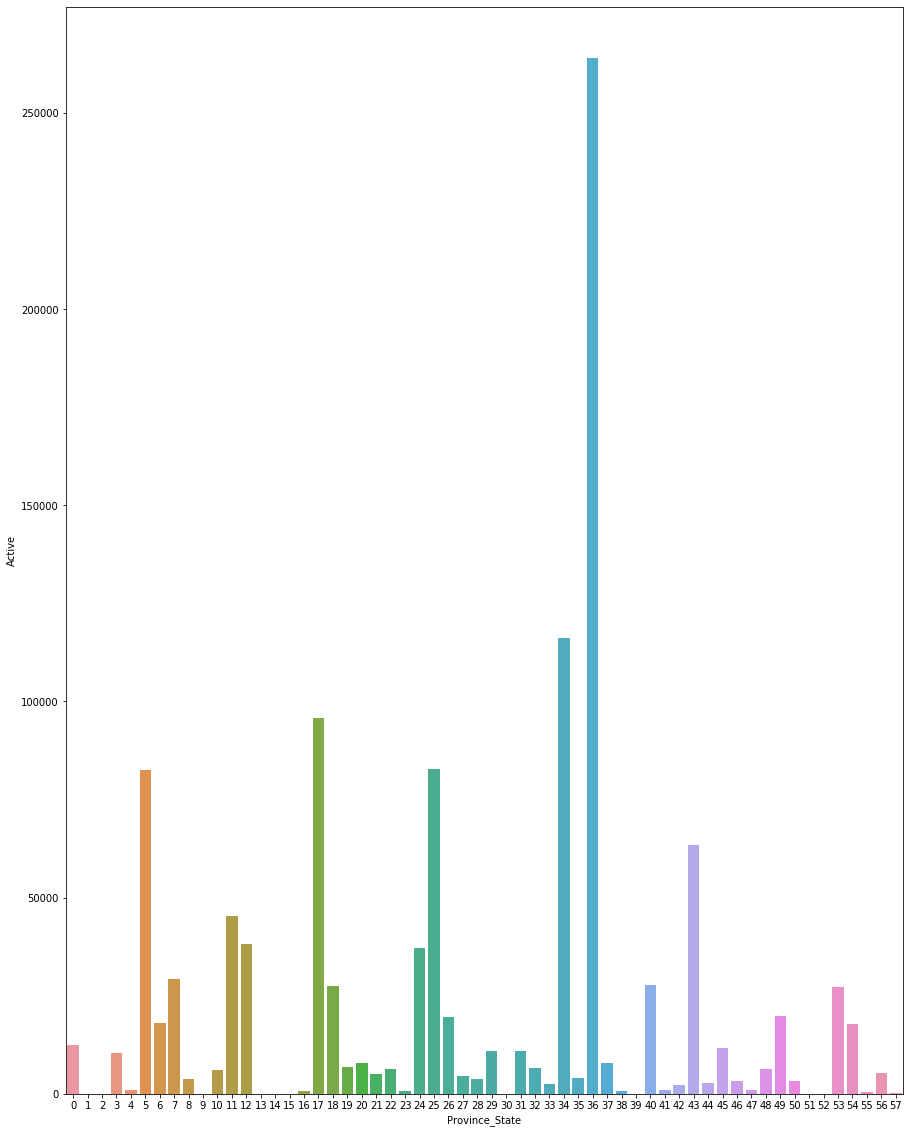

In [186]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Active',data=df1)

State 36 has the highest number of active cases.

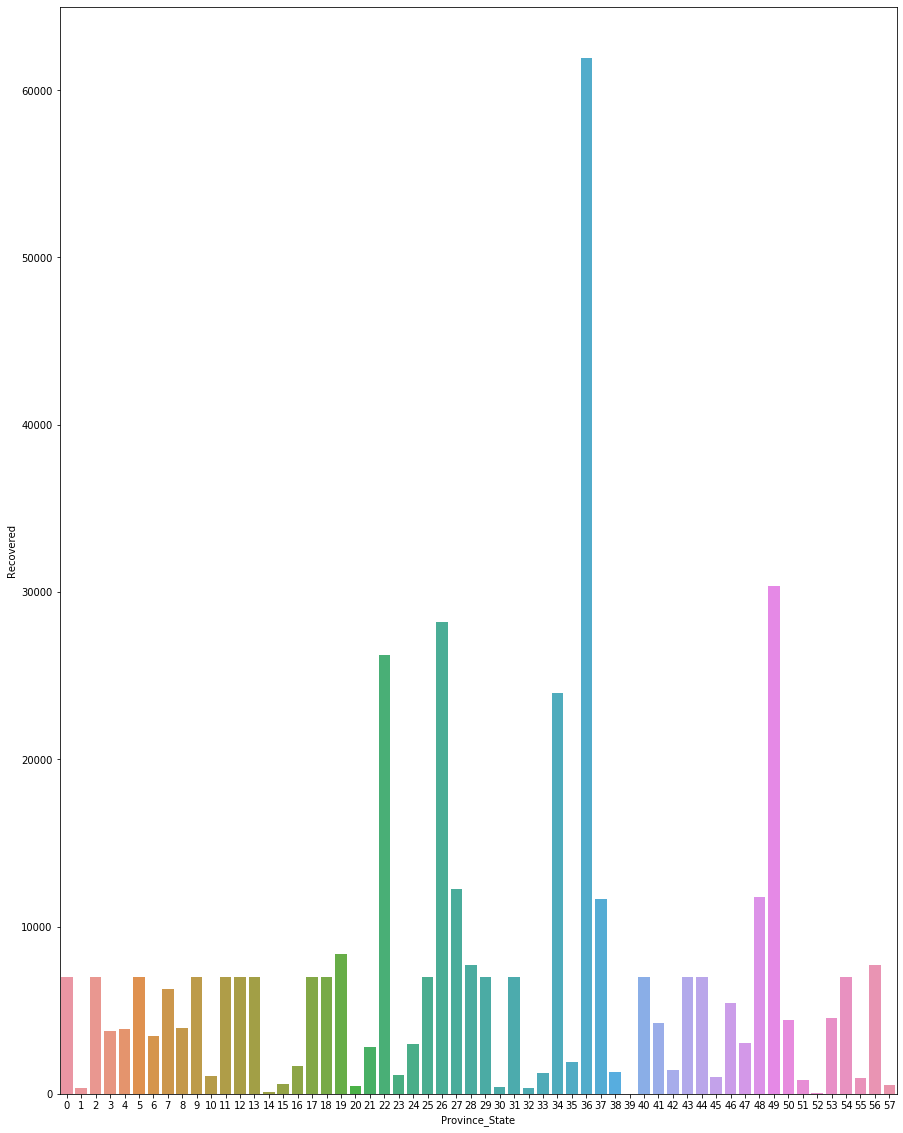

In [187]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Recovered',data=df1)

State 36 has the highest number of recoveries.

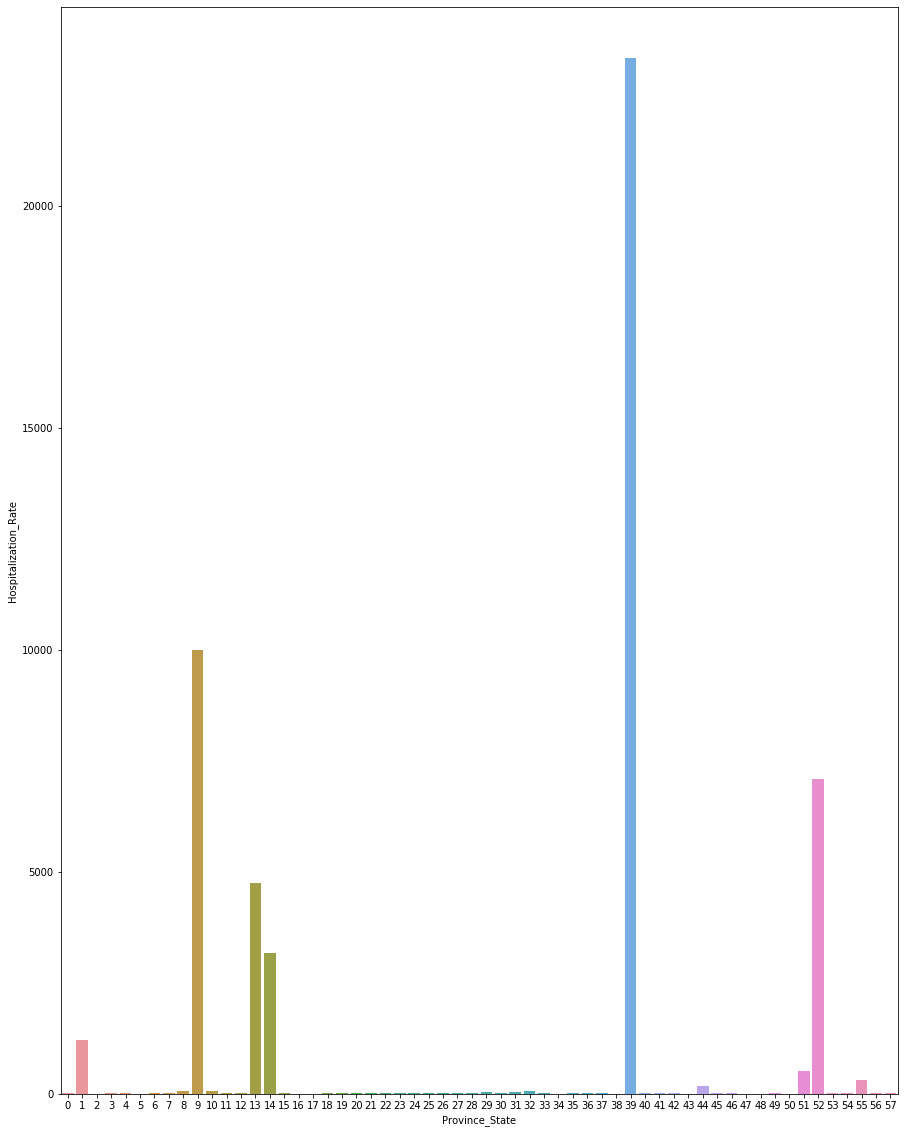

In [188]:
plt.figure(figsize=(15,20))
sns.barplot('Province_State','Hospitalization_Rate',data=df1)

state=39 has the highest hospitalization rate.

In [191]:
#skewness treatment
df.skew()

Province_State         -0.046290
Confirmed               1.890534
Deaths                  2.057499
Recovered               2.424527
Active                  2.436389
FIPS                    0.424343
Incident_Rate           1.616604
People_Tested           1.789303
People_Hospitalized     0.506398
ISO3                    0.000000
Testing_Rate            0.722827
Hospitalization_Rate    6.662418
Mortality_Rate          0.556802
dtype: float64

In [192]:
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=df[i].apply(lambda x:np.log(x+1))

In [194]:
#X Y Split
x=df.drop(['Mortality_Rate'],axis=1)
y=df['Mortality_Rate']
y=y.values.reshape(-1,1)

In [195]:
#Scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
dx=se.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)
x

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.781752,0.272702,0.249588,0.607253,0.547632,-1.656767,0.041531,0.333939,-0.761222,0.000000,0.046507,-0.514856
1,-1.721789,-2.003235,-2.011018,-1.756471,-2.068885,-1.601087,-1.924814,-0.875485,0.525137,0.000000,0.717883,2.918193
2,-1.601864,0.359554,0.459055,0.117662,0.462199,-1.489727,-0.286366,0.338785,-0.648247,0.000000,-0.587459,-0.480572
3,-1.541901,-0.354287,-0.673841,0.134048,-0.583363,-1.434046,-0.550264,-0.100648,-1.123199,0.000000,-0.035320,-0.561091
4,-1.421975,0.637377,0.782612,0.053285,0.713049,-1.267006,0.538325,0.154578,0.169035,0.000000,-0.575689,-0.223956
5,-1.362012,0.988775,1.367381,0.518558,0.933169,-1.211326,1.813161,0.454187,2.810557,0.000000,0.807220,0.119978
6,-1.302050,-0.031705,-0.054692,0.156912,0.018548,-1.155646,1.483550,-0.710243,0.525137,0.000000,0.583659,0.672168
7,-1.182124,-0.085140,0.104227,-0.886759,0.218824,-1.099966,1.784837,-0.804756,0.525137,0.000000,0.918433,0.732355
8,-1.122161,1.117024,1.062514,0.607253,1.133473,-1.044286,-0.191013,1.588055,2.050330,0.000000,0.157963,-0.166242
9,-1.062198,1.001784,0.938962,0.607253,1.053964,-0.988606,0.470047,1.061141,1.360006,0.000000,0.247859,-0.203537


Modelling

In [197]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [198]:
#Calculating best r score
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        r2=r2_score(ytest,ypred)
        if r2>max_score:
            max_score=r2
            final_r_state=r_state
            print(max_score,'is max accuracy against r_state',final_r_state)
            print(cross_val_score(model,x,y,cv=10).mean())

In [199]:
lr=LinearRegression()
max_score(lr)

0.9935010949969743 is max accuracy against r_state 42
0.9853721900506202
0.9941060389051737 is max accuracy against r_state 47
0.9853721900506202
0.9966923142079198 is max accuracy against r_state 52
0.9853721900506202
0.9984956068806341 is max accuracy against r_state 64
0.9853721900506202


In [200]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid=GridSearchCV(estimator=Ridge(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.01}


In [201]:
rd=Ridge(alpha=.01)
max_score(rd)

0.9939714918907188 is max accuracy against r_state 42
0.9914397729192505
0.9943917916895328 is max accuracy against r_state 43
0.9914397729192505
0.9969508581784274 is max accuracy against r_state 52
0.9914397729192505
0.9983484326972314 is max accuracy against r_state 64
0.9914397729192505


In [202]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid1=GridSearchCV(estimator=Lasso(),param_grid=alpha)
grid1.fit(x,y)
print(grid1.best_params_)

{'alpha': 0.001}


In [203]:
ls=Lasso(alpha=.001)
max_score(ls)

0.9946159422596079 is max accuracy against r_state 42
0.990960431492231
0.9952149455597219 is max accuracy against r_state 43
0.990960431492231
0.9970563906360568 is max accuracy against r_state 52
0.990960431492231
0.9975484546918157 is max accuracy against r_state 71
0.990960431492231


In [204]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid=GridSearchCV(estimator=ElasticNet(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.001}


In [205]:
en=ElasticNet(alpha=0.001)
max_score(en)

0.9945796827529039 is max accuracy against r_state 42
0.9909207664159903
0.9950451003785314 is max accuracy against r_state 43
0.9909207664159903
0.9970446174257922 is max accuracy against r_state 52
0.9909207664159903
0.9974830607241932 is max accuracy against r_state 71
0.9909207664159903
0.9975429383213548 is max accuracy against r_state 78
0.9909207664159903


In [206]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
max_score(svr)

0.9801071538211348 is max accuracy against r_state 42
0.9257945428422989
0.981367606367957 is max accuracy against r_state 57
0.9257945428422989


In [208]:
from sklearn.neighbors import KNeighborsRegressor
#Knr
n_neighbors={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=n_neighbors)
grid.fit(x,y)
print(grid.best_params_)

{'n_neighbors': 5}


In [210]:
knr=KNeighborsRegressor(n_neighbors=5)
max_score(knr)

0.16263111526988905 is max accuracy against r_state 42
0.06517243876204931
0.2825057652950198 is max accuracy against r_state 46
0.06517243876204931
0.35418588883574154 is max accuracy against r_state 51
0.06517243876204931
0.3902608136190282 is max accuracy against r_state 55
0.06517243876204931
0.42493350173085076 is max accuracy against r_state 59
0.06517243876204931
0.47003520780145336 is max accuracy against r_state 65
0.06517243876204931
0.4796821907916883 is max accuracy against r_state 66
0.06517243876204931
0.6520551456879062 is max accuracy against r_state 96
0.06517243876204931


In [213]:
#modelling on PCA data

models=[]
models.append(('Linear Regression',lr,64))
models.append(('Lasso Regression',ls,71))
models.append(('Ridge regression',rd,64))
models.append(('Elastic Net',en,78))
models.append(('Support Vector Regressor',svr,57))
models.append(('KNeighborsRegressor',knr,96))

Model=[]
R2Score=[]
Cvs=[]
MAE=[]
MSE=[]
RMSE=[]

In [214]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Model.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    R2=r2_score(ytest,pred)
    print('R2 score=',R2)
    R2Score.append(R2*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    mae=mean_absolute_error(ytest,pred)
    print('Mean Absolute Error=',mae)
    MAE.append(mae)
    print('\n')
    mse=mean_squared_error(ytest,pred)
    print("Mean Squared Error=",mse)
    MSE.append(mse)
    print('\n')
    rmse=np.sqrt(mean_squared_error(ytest,pred))
    print('Root Mean Squared Error=',rmse)
    RMSE.append(rmse)

*********** Linear Regression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 score= 0.9984956068806341


Cross Validation Score= 0.979082867250515


Mean Absolute Error= 0.013171158220222167


Mean Squared Error= 0.00022442873798329328


Root Mean Squared Error= 0.014980945830730891
*********** Lasso Regression ************


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 score= 0.9975484546918157


Cross Validation Score= 0.99302792627121


Mean Absolute Error= 0.011900609063688927


Mean Squared Error= 0.00017740476411479193


Root Mean Squared Error= 0.013319337975845193
*********** Ridge regression ************


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 score= 0.9983484326972314


In [215]:
Result=pd.DataFrame({'Model':Model,'R2_Score':R2Score,'Cross Validation Score':Cvs,'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
Result

,Model,R2_Score,Cross Validation Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,99.849561,0.979083,0.013171,0.000224,0.014981
1,Lasso Regression,99.754845,0.993028,0.011901,0.000177,0.013319
2,Ridge regression,99.834843,0.988391,0.014145,0.000246,0.015697
3,Elastic Net,99.754294,0.992690,0.015096,0.000322,0.017954
4,Support Vector Regressor,98.136761,0.941062,0.045999,0.002768,0.052610
5,KNeighborsRegressor,65.205515,0.240757,0.110056,0.021113,0.145303


Linear regression and Ridge Regression are the best models

In [216]:
#saving the model
joblib.dump(lr,'lr.covid-usa.obj')

['lr.covid-usa.obj']

In [217]:
joblib.dump(rd,'rd.covid-usa.obj')

['rd.covid-usa.obj']

Now, K means clustering is done

In [218]:
#KMean clustering
from sklearn.cluster import KMeans

In [219]:
kmeans=KMeans(n_clusters=3)
kmodel=kmeans.fit(df)

In [220]:
kmodel.labels_

array([1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1])

In [221]:
kmodel.cluster_centers_

array([[3.16818182e+01, 9.23709393e+00, 6.17020961e+00, 8.23574332e+00,
        8.48924654e+00, 3.40454545e+01, 5.66808401e+00, 1.15396306e+01,
        4.89796281e+03, 4.00000000e+00, 7.96725627e+00, 3.91006616e+00,
        1.73864984e+00],
       [3.09090909e+01, 8.48780748e+00, 5.02077456e+00, 7.80779423e+00,
        7.42070484e+00, 3.06818182e+01, 5.24750521e+00, 1.13849062e+01,
        9.47363636e+02, 4.00000000e+00, 8.13876613e+00, 2.57295950e+00,
        1.42740312e+00],
       [1.58000000e+01, 1.07961043e+01, 7.92523969e+00, 8.66234116e+00,
        1.06806698e+01, 1.66000000e+01, 6.40944934e+00, 1.28005993e+01,
        8.65540000e+03, 4.00000000e+00, 8.41213389e+00, 2.92132887e+00,
        1.90160164e+00]])